In [1]:
# In[ ] Importing libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import squarify
import seaborn as sns
from tabulate import tabulate

In [2]:
# In[ ] Importing Data

df = pd.read_csv("cases-brazil.csv", delimiter=",")
df.head()

,country,state,city,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,date,newCases,newDeaths,last_info_date
0,Brazil,GO,Abadia de Goiás/GO,5200050,50,4074,545.97074,44485.69557,0.01227,MS,2023-03-18,5,0,2023-03-18
1,Brazil,MG,Abadia dos Dourados/MG,3100104,21,1943,299.06010,27670.17944,0.01081,MS,2023-03-18,0,0,2023-03-18
2,Brazil,GO,Abadiânia/GO,5200100,55,2218,263.49830,10626.16778,0.02480,MS,2023-03-18,-1,0,2023-03-18
3,Brazil,PA,Abaetetuba/PA,1500107,244,12009,152.08272,7485.08779,0.02032,MS,2023-03-18,13,0,2023-03-18
4,Brazil,MG,Abaeté/MG,3100203,51,4279,219.23226,18394.01625,0.01192,MS,2023-03-18,0,0,2023-03-18


In [3]:
# In[ ] Data Wragling 
# Drop the columns with irrelevant data
columns_to_remove = ['country', 'city', 'ibgeID', '_source', 'newCases', 'newDeaths']
df = df.drop(columns_to_remove, axis=1)

# List of states
states = ['AC', 'AL', 'AP', 'AM', 'BA', 
          'CE', 'ES', 'GO', 'MA', 'MT', 
          'MS', 'MG', 'PA', 'PB', 'PR', 
          'PE', 'PI', 'RJ', 'RN', 'RS', 
          'RO', 'RR', 'SC', 'SP', 'SE', 
          'TO', 'DF']

# Create a dictionary to store state groups
state_groups = {}

# Group the data by state
for state in states:
    state_group = df[df['state'] == state]
    state_sum = state_group.sum(numeric_only=True)
    state_groups[state] = state_sum
    
# Create a DataFrame from the dictionary
df_by_state = pd.DataFrame.from_dict(state_groups, orient='index')

# Renaming the index column
df_by_state.index.name = 'states'

# Reset the index to numbers
df_by_state.reset_index(level=0, inplace=True)
df_by_state.rename(columns={'index': 'numbers'}, inplace=True)

# Dictionary mapping state abbreviations to full names
state_names = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins',
    'DF': 'Distrito Federal'
}

# Add a new column with full state names
df_by_state.insert(1, 'state_names', df_by_state['states'].map(state_names))

# Rename the columns 
df_by_state.rename(columns={'states': 'States', 
                            'state_names': 'State Names',
                            'deaths': 'Deaths',
                            'totalCases': 'Total Cases',
                            'deaths_per_100k_inhabitants': 'Deaths per 100k Inhabitants',
                            'totalCases_per_100k_inhabitants': 'Total Cases per 100k Inhabitants',
                            'deaths_by_totalCases': 'Deaths by Total Cases'}, 
                   inplace=True)

df_by_state.head()

,States,State Names,Deaths,Total Cases,Deaths per 100k Inhabitants,Total Cases per 100k Inhabitants,Deaths by Total Cases
0,AC,Acre,2043.0,160452.0,3717.90355,3.283465e+05,0.25324
1,AL,Alagoas,7242.0,337568.0,15867.77482,7.829426e+05,2.32507
2,AP,Amapá,2167.0,185673.0,2095.08167,3.626445e+05,0.09792
3,AM,Amazonas,14443.0,631976.0,13016.01972,1.072288e+06,0.83679
4,BA,Bahia,31459.0,1792572.0,83764.34331,5.562150e+06,6.79622


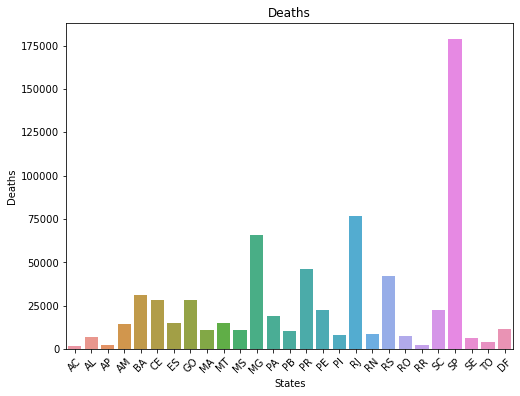

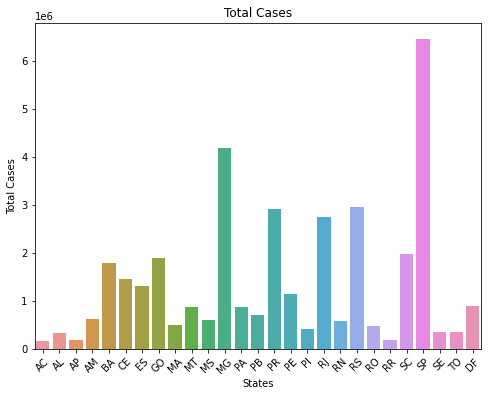

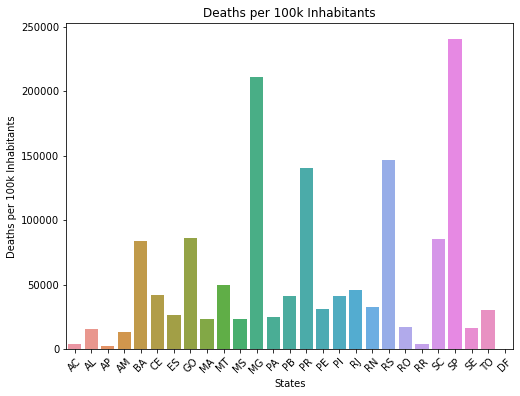

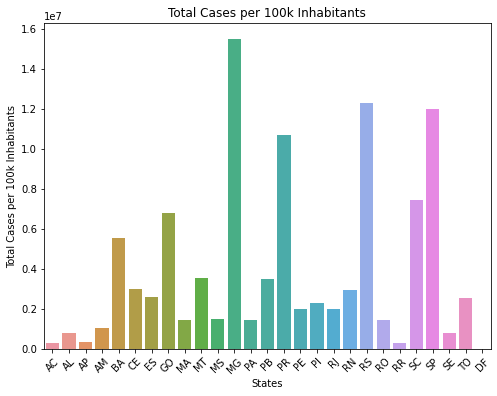

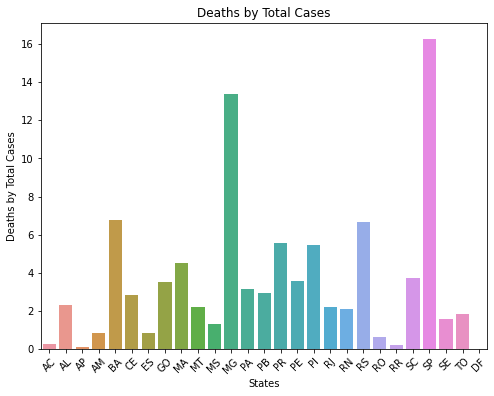

In [4]:
# In[ ] Data Visualization

# Set the first column as the x-axis for all charts
x_values = df_by_state['States']

# Plot a chart for each column except the first one
for column in df_by_state.columns[2:]:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=x_values, y=df_by_state[column])
    plt.title(f'{column}')
    plt.xlabel('States')
    plt.ylabel(f'{column}')
    plt.xticks(rotation=45)
    plt.show()

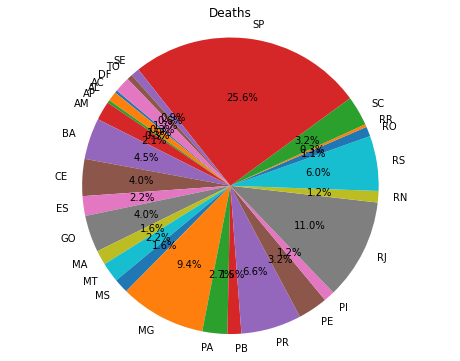

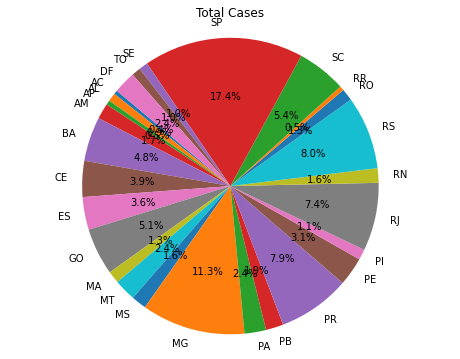

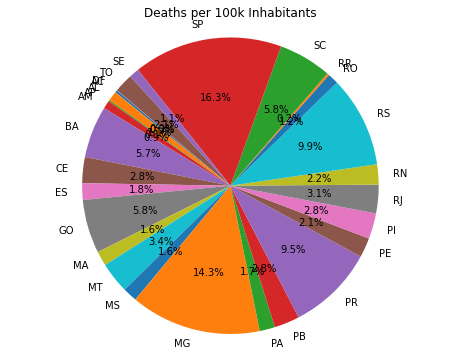

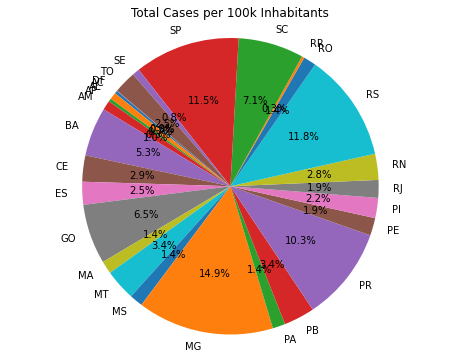

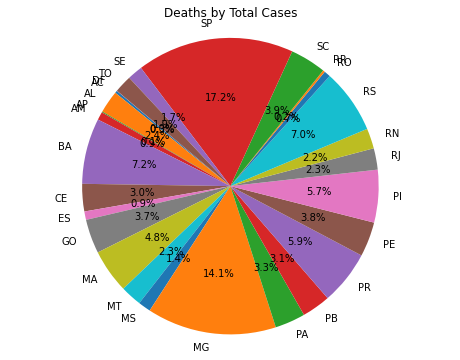

In [5]:
# In[ ] Data Visualization Piechart 

# Set the first column as the x-axis for all charts
x_values = df_by_state['States']

# Plot a chart for each column except the first one
for column in df_by_state.columns[2:]:
    plt.figure(figsize=(8, 6))
    plt.pie(df_by_state[column], labels=df_by_state['States'], autopct='%1.1f%%', startangle=140)
    plt.title(f'{column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

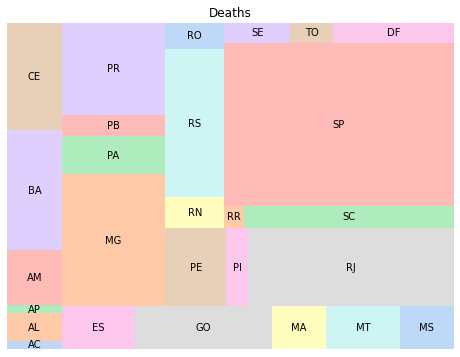

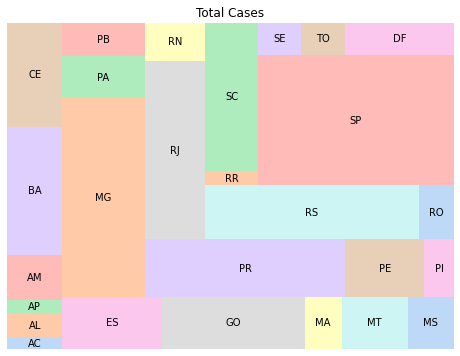

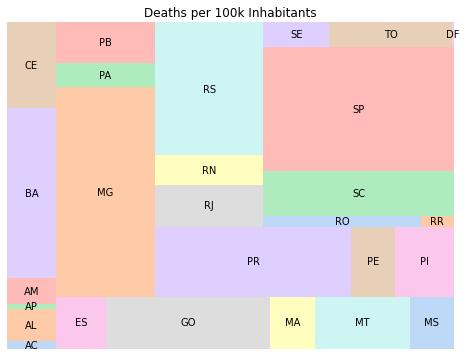

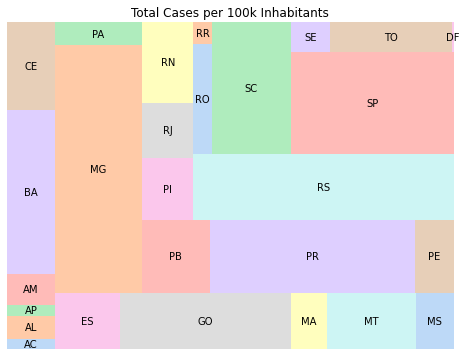

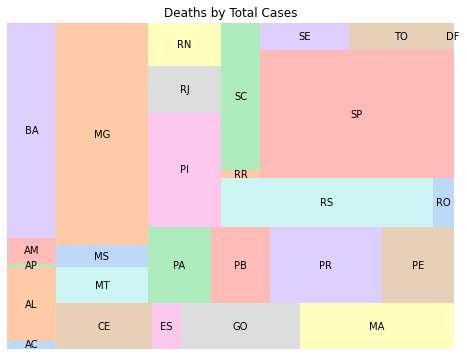

In [6]:
# In[ ] Data Visualization Square Percentage

for column in df_by_state.columns[2:]:
    plt.figure(figsize=(8, 6))
    
    values = df_by_state[column].values
    labels = df_by_state.index
    state_abbr = [abbr for abbr in df_by_state['States']]
    
    colors = sns.color_palette('pastel')[0:len(values)]
    
    squarify.plot(sizes=values, label=state_abbr, color=colors, alpha=0.7)
    
    plt.title(f'{column}')
    plt.axis('off')  # Turn off axis since this is a treemap
    
    plt.show()

In [7]:
# In[ ] Brazil's map Data Wragling

# Read the shapefile data
uf_br = gpd.read_file('gadm36_BRA_1.shp')
uf_br_geo = uf_br[['NAME_1', 'geometry']]

# Rename the column to merge the dataset
uf_br_geo.rename(columns={'NAME_1': 'State Names'}, inplace=True)

# Merge the population data with the GeoDataFrame
merged_df = uf_br_geo.merge(df_by_state, on='State Names')


C:\Users\digui\anaconda3\Lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\digui\AppData\Local\Temp\ipykernel_4620\342646462.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uf_br_geo.rename(columns={'NAME_1': 'State Names'}, inplace=True)


C:\Users\digui\anaconda3\Lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


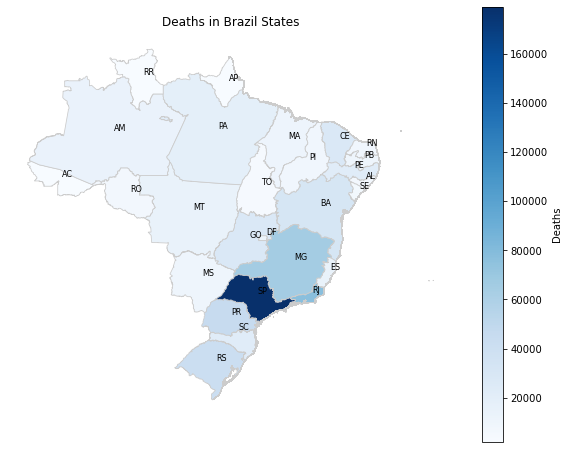

C:\Users\digui\anaconda3\Lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


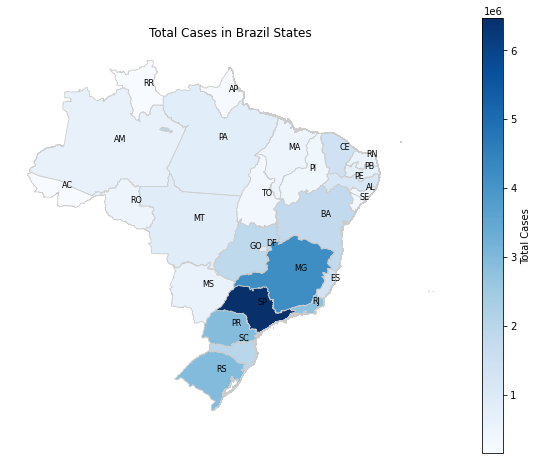

C:\Users\digui\anaconda3\Lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


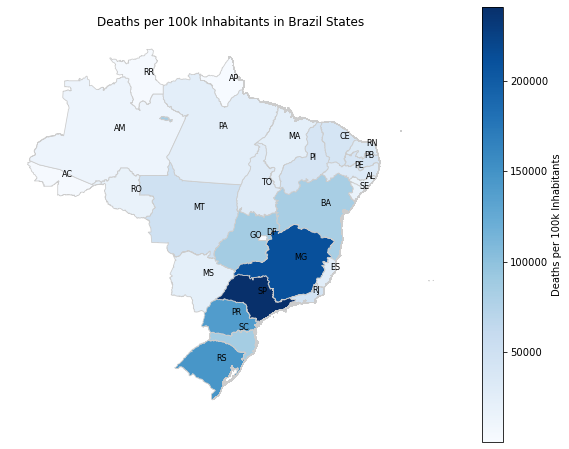

C:\Users\digui\anaconda3\Lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


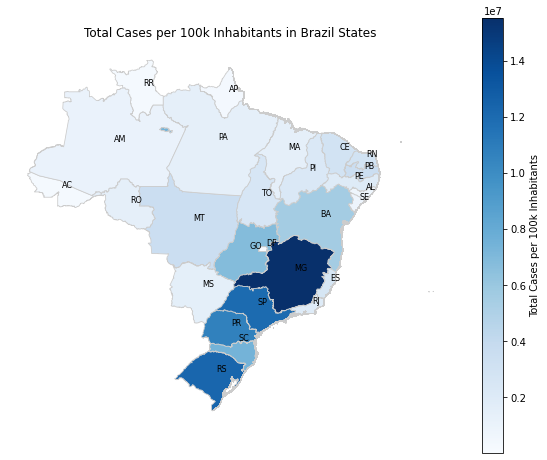

C:\Users\digui\anaconda3\Lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


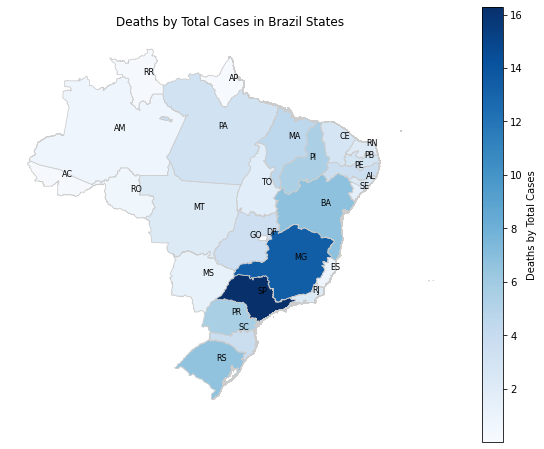

In [8]:
# In[ ] Brazil's map Data Visualization

# Iterate through each column (excluding non-numeric columns)
for column in merged_df.columns:
    if column not in ['States', 'State Names', 'geometry']:
        # Normalize population values between 0 and 1 for coloring
        col_min = merged_df[column].min()
        col_max = merged_df[column].max()
        norm = Normalize(vmin=col_min, vmax=col_max)

        # Create a scalar mappable to apply colormap to the map
        sm = ScalarMappable(cmap='Blues', norm=norm)
        sm.set_array([])  # dummy array for the scalar mappable

        # Plot the map with the colored regions
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        merged_df.plot(column=column, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
        ax.set_title(f'{column} in Brazil States')
        ax.set_axis_off()
        
        # Loop through the rows of the DataFrame to annotate state abbreviations
        for idx, row in merged_df.iterrows():
            state_abbr = row['States']  
            state_geometry = row['geometry'] 
            
            # Get the centroid of the state geometry
            centroid = state_geometry.centroid
            
            # Annotate the abbreviation at the centroid
            ax.annotate(text=state_abbr, xy=(centroid.x, centroid.y), xytext=(3, 3),
                        textcoords="offset points", color='black', fontsize=8)


        # Create colorbar
        cbar = fig.colorbar(sm, ax=ax)
        cbar.set_label(column)

        # Save or show the map
        plt.savefig(f'{column}_map.png')  # Save the figure as an image
        plt.show()  # Display the figure

In [9]:
# In[ ] Data Statistics

df_statistics = df_by_state.describe()

# Convert the statistics DataFrame to a text-based table
statistics_table = tabulate(df_statistics, headers='keys', tablefmt='grid')

# Display the table in the notebook
print(statistics_table)


+-------+----------+------------------+-------------------------------+------------------------------------+-------------------------+
|       |   Deaths |      Total Cases |   Deaths per 100k Inhabitants |   Total Cases per 100k Inhabitants |   Deaths by Total Cases |
+=======+==========+==================+===============================+====================================+=========================+
| count |     27   |     27           |                        27     |                       27           |                27       |
+-------+----------+------------------+-------------------------------+------------------------------------+-------------------------+
| mean  |  25900.4 |      1.37354e+06 |                     54802.5   |                        3.86719e+06 |                 3.51607 |
+-------+----------+------------------+-------------------------------+------------------------------------+-------------------------+
| std   |  35874.2 |      1.44668e+06 |                

In [10]:
# In[ ] Data through time
 
df2 = pd.read_excel("cases-time.xlsx")
df2.head()

# Check the columns name
df2.columns

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')

In [11]:
# Drop the columns with irrelevant data
columns_to_remove = ['epi_week', 'country', 'city']
df2 = df2.drop(columns_to_remove, axis=1)

# Remove rows where 'state' column is 'TOTAL'
df2 = df2[df2['state'] != 'TOTAL']

# Group by month and aggregate other columns by sum
grouped = df2.groupby(df2['date'].dt.to_period('M')).agg('sum')

C:\Users\digui\AppData\Local\Temp\ipykernel_4620\250724335.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df2.groupby(df2['date'].dt.to_period('M')).agg('sum')


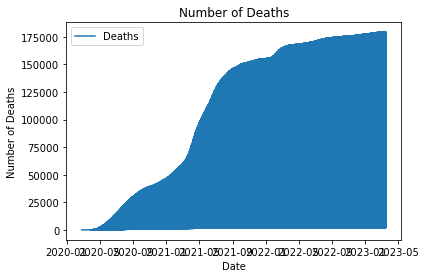

In [12]:
# In[ ] Plotting the charts

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the variables
ax.plot(df2['date'], df2['deaths'], label='Deaths')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax.set_title('Number of Deaths')

# Format x-axis date labels
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

# Add a legend
ax.legend()

# Display the plot
plt.show()

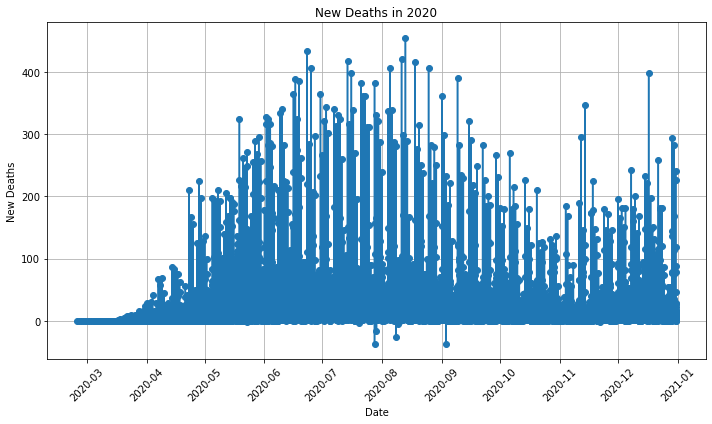

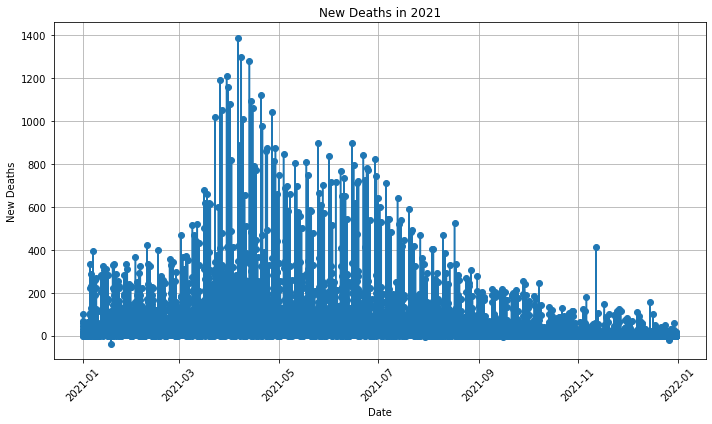

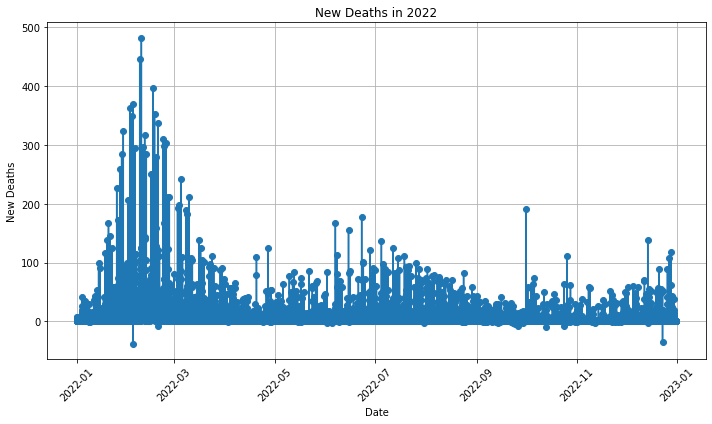

In [13]:
# In[ ] Plotting by year

# Filter rows for the years 2020, 2021, 2022
years = [2020, 2021, 2022]
filtered_df2 = df2[df2['date'].dt.year.isin(years)]

# Group by year and plot for each year
for year in years:
    year_data = filtered_df2[filtered_df2['date'].dt.year == year]
    
    plt.figure(figsize=(10, 6))
    plt.plot(year_data['date'], year_data['newDeaths'], marker='o')
    plt.title(f'New Deaths in {year}')
    plt.xlabel('Date')
    plt.ylabel('New Deaths')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()